In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re

%matplotlib inline

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_json('data/nepali-movies.json')

In [3]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138 min,Chhakka Panja 2,290.0,2017
1,Comedy,https://www.imdb.com/title/tt8393764/,When she learns about the worst condition of t...,6.3,None,Chhakka Panja 3,96.0,2018
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120 min,Intu Mintu Londonma,71.0,2018
3,"Comedy, Drama, Romance",https://www.imdb.com/title/tt10942220/,Add a Plot,8.6,None,Kabaddi Kabaddi Kabaddi,9.0,2019
4,"Drama, Sport",https://www.imdb.com/title/tt8387542/,Father's dedication to guiding his son to beco...,3.2,None,Captain,46.0,2019


# Genre Analysis

In [4]:
data['genre'].value_counts()

Drama                              147
Short, Drama                        58
Drama, Romance                      42
Romance                             41
Documentary                         40
Documentary, Short                  39
Short                               30
Comedy                              23
Short, Music                        23
Action                              21
Comedy, Drama                       17
Short, Musical                      13
Action, Drama                       10
Musical                              8
Short, Drama, Family                 7
Thriller                             7
Family                               6
Comedy, Drama, Romance               6
Drama, Family                        6
Documentary, Short, Drama            5
Documentary, Short, Adventure        5
Talk-Show                            4
Drama, History                       4
Documentary, Short, History          4
Crime                                4
Drama, Musical           

In [5]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 10]

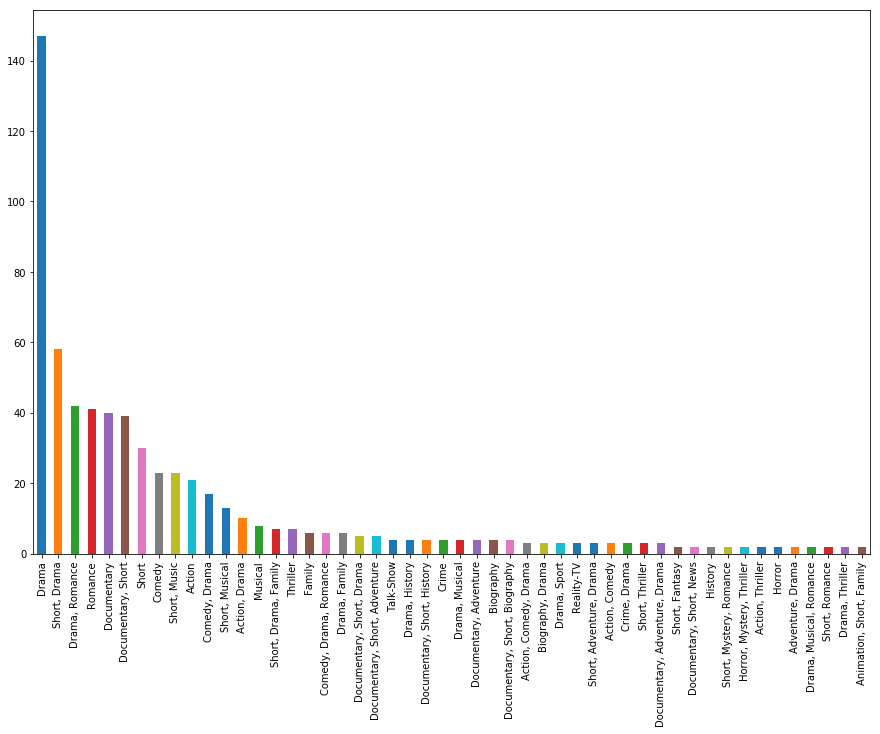

In [6]:
data['genre'].value_counts()[:50].plot('bar')

#### Simple Genre
The original data consists of multiple genre for each movie. So, here I break down them into simple (and common) genres to make the analysis efficient.

In [7]:
genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [8]:
count_map = {}
for genre in genre_list:
    count_map[genre] = len(data['genre'].dropna().apply(lambda x : genre if genre in x.lower() else None).dropna())

In [9]:
count_map

{'drama': 367,
 'romance': 117,
 'comedy': 62,
 'biography': 20,
 'documentary': 119,
 'crime': 18,
 'thriller': 22,
 'action': 55,
 'music': 63}

In [10]:
types = np.array(list(count_map.keys()))
types

array(['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime',
       'thriller', 'action', 'music'], dtype='<U11')

In [11]:
counts = np.array(list(count_map.values()))
counts

array([367, 117,  62,  20, 119,  18,  22,  55,  63])

In [12]:
#types[np.argsort(counts)[::-1]]

Text(0.5, 1.0, 'Nepali Movie Genre')

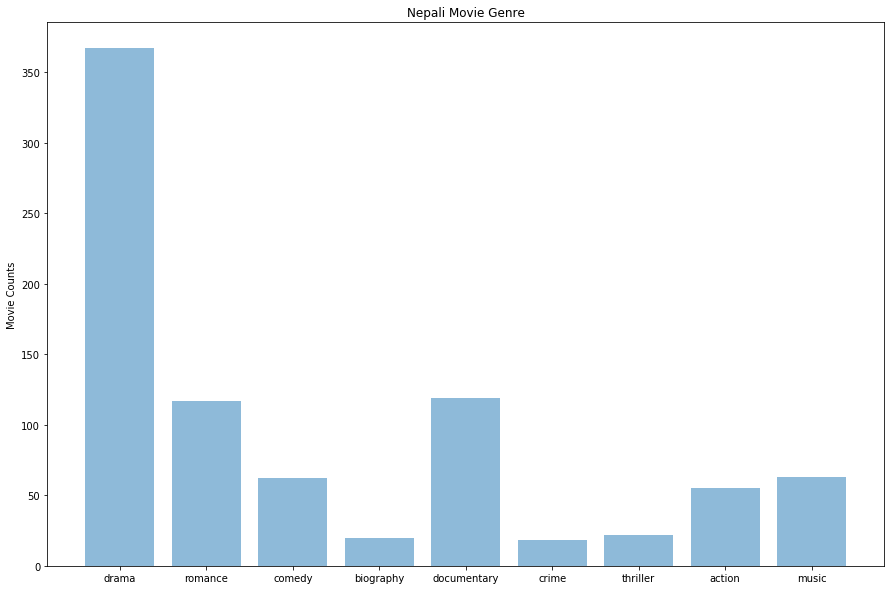

In [13]:
y_pos = np.arange(len(types))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.ylabel('Movie Counts')
plt.title('Nepali Movie Genre')

In [14]:
data['rating'].describe()

count    259.000000
mean       7.491506
std        1.110488
min        2.200000
25%        6.850000
50%        7.600000
75%        8.300000
max       10.000000
Name: rating, dtype: float64

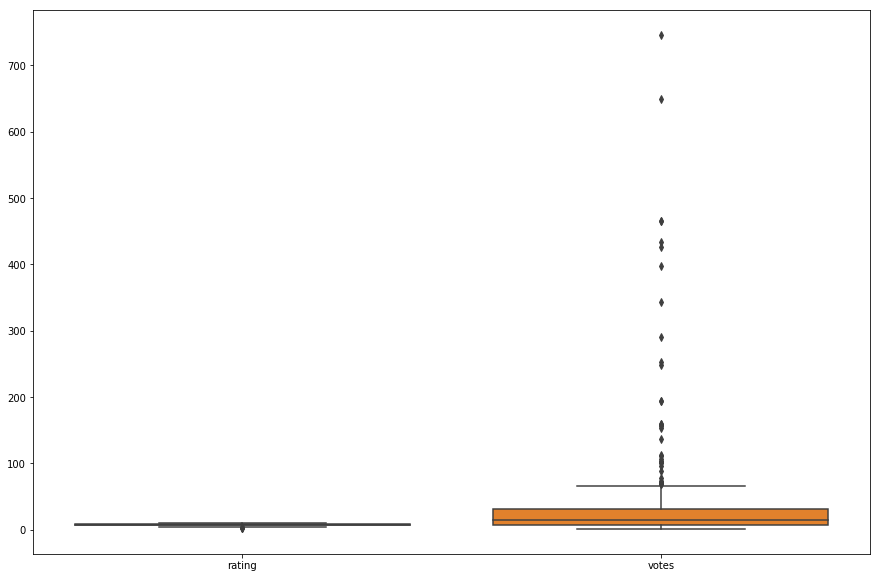

In [15]:
sns.boxplot(data=data)

# Year and Rating

Get ratings and years as they are.

In [16]:
df_rating = data[data['rating'].notnull()]
df_rating = df_rating[['rating', 'year']]
df_rating

,rating,year
0,6.6,2017
1,6.3,2018
2,7.3,2018
3,8.6,2019
4,3.2,2019
5,7.1,2019
6,7.9,2015
7,6.9,2014
8,8.5,2019
9,7.7,2018


### Get Average Rating per Year

In [17]:
df_rating_mean = df_rating.groupby('year').mean()
df_rating_mean.reset_index(inplace=True)
df_rating_mean

,year,rating
0,1964,9.000000
1,1966,8.800000
2,1973,8.600000
3,1977,9.200000
4,1978,8.100000
5,1983,6.800000
6,1984,8.250000
7,1985,6.900000
8,1987,7.700000
9,1989,8.100000


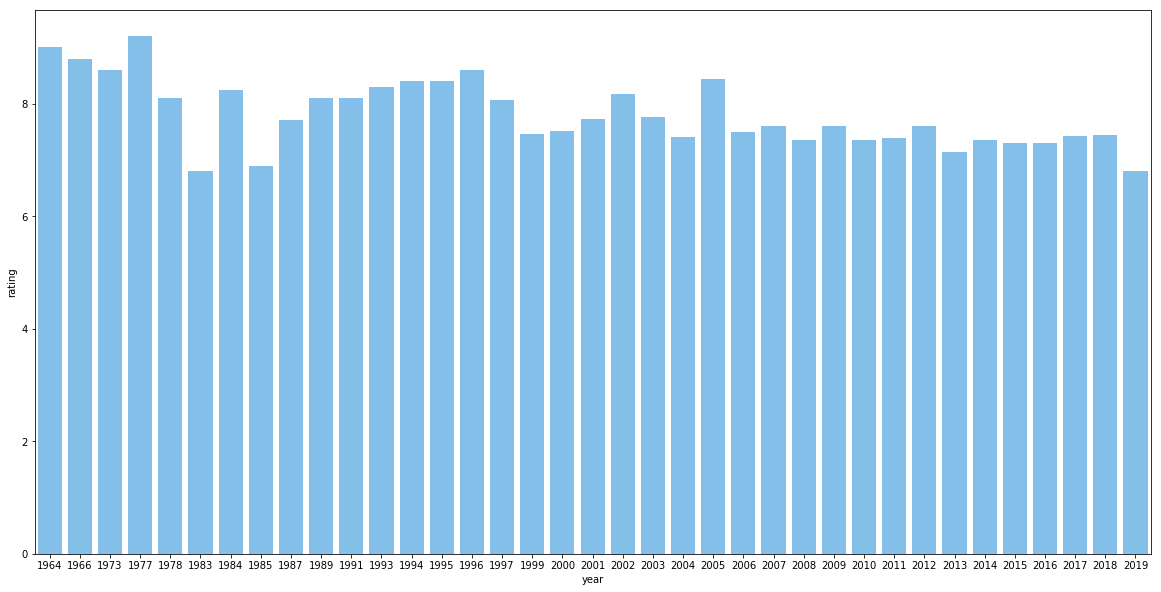

In [18]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='rating', data=df_rating_mean, color='#73C2FB')

In [19]:
df_rating[df_rating['year'] == 1966]

,rating,year
55,8.8,1966


In [20]:
df_rating[df_rating['year'] == 1996]

,rating,year
159,8.6,1996


In [21]:
data['rating'].mean()

7.491505791505792

In [22]:
df_rating.describe()

,rating
count,259.000000
mean,7.491506
std,1.110488
min,2.200000
25%,6.850000
50%,7.600000
75%,8.300000
max,10.000000


#### thoughts
It seems there are no drastic fluctuations in ratings based on year. The average rating till 2018 is **7.6**.
The highest ratings seem to in the year 1966 and 1996.
But that doesn't mean they are good representation for the analysis since **1996** has only one non-null rating value while **1966** has only a single movie in the database.

# Year and Movie Count

In [23]:
df_movie_count = df_rating.groupby('year').count()
df_movie_count.reset_index(inplace=True)
df_movie_count.columns = ['year', 'movie_count']
df_movie_count

,year,movie_count
0,1964,1
1,1966,1
2,1973,1
3,1977,1
4,1978,1
5,1983,1
6,1984,2
7,1985,1
8,1987,2
9,1989,1


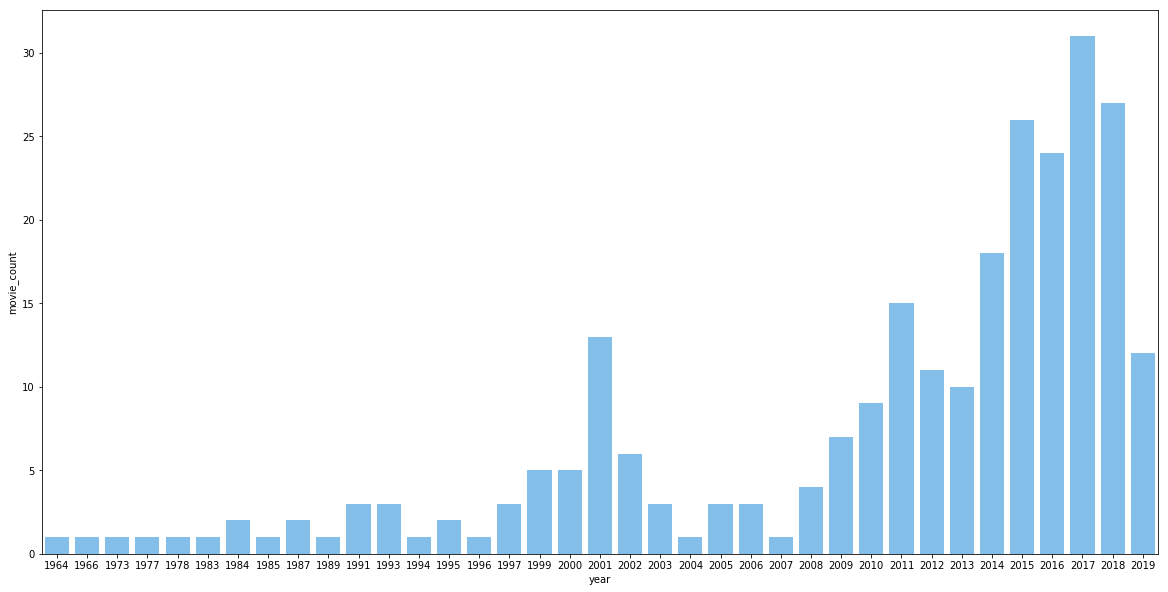

In [24]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='movie_count', data=df_movie_count, color='#73C2FB')

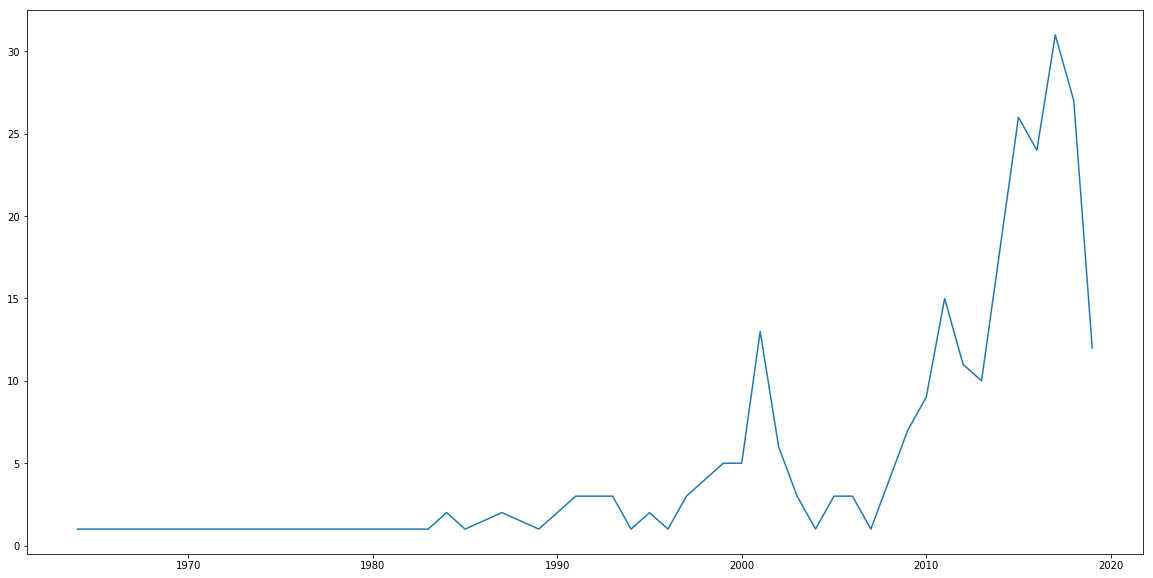

In [25]:
plt.plot(df_movie_count['year'], df_movie_count['movie_count'])

#### thoughts
It seems, the total number of Nepali movies got a big dip around the years **2001-2011** with **2004** being the lowest. Perhaps, it might be due to the [Nepalese Civil war](https://en.wikipedia.org/wiki/Nepalese_Civil_War). This is just my hypothesis for this.  
Since then, the total number of movies per year is increasing (with some minor ups and downs).

# Rating filtered by Movie Count per Year

In [26]:
# get those years having more than 2 movies
df_rating_2 = pd.concat([group for _, group in df_rating.groupby('year') if len(group) > 2])

In [27]:
df_rating_2

,rating,year
61,8.0,1991
110,7.9,1991
113,8.4,1991
62,8.4,1993
229,8.2,1993
344,8.3,1993
33,9.1,1997
365,6.8,1997
377,8.3,1997
84,7.1,1999


#### thoughts
Now, let's take only those years that have more than a single movie.

In [28]:
df_rating_mean = df_rating_2.groupby('year').mean()
df_rating_mean.reset_index(inplace=True)
df_rating_mean

,year,rating
0,1991,8.100000
1,1993,8.300000
2,1997,8.066667
3,1999,7.460000
4,2000,7.520000
5,2001,7.730769
6,2002,8.166667
7,2003,7.766667
8,2005,8.433333
9,2006,7.500000


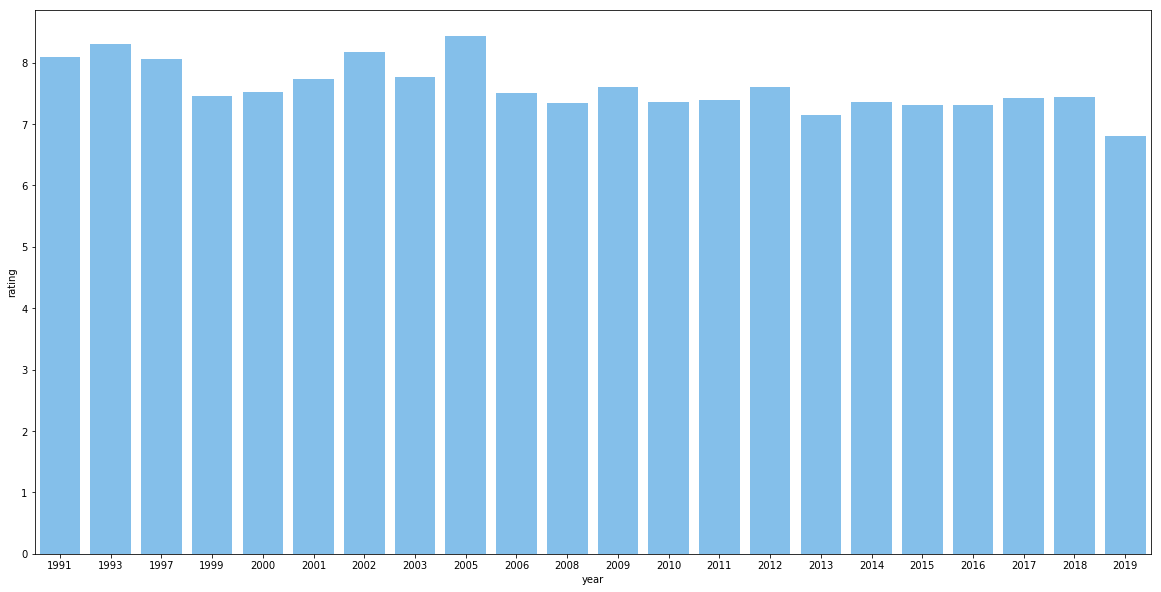

In [29]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='rating', data=df_rating_mean, color='#73C2FB')

In [30]:
df_rating_mean['rating'].describe()

count    22.000000
mean      7.596626
std       0.399145
min       6.808333
25%       7.355556
50%       7.480000
75%       7.757692
max       8.433333
Name: rating, dtype: float64

#### thoughts
From the bar plot, we can see that the average rating per year in steady throughout.     
I have no idea (at the time of writing this). :D

# Movie Runtime

In [31]:
data.isnull().sum()

genre        77
imdb_url      0
plot          0
rating      541
runtime     416
title         0
votes       541
year          3
dtype: int64

In [32]:
df_runtime = data[data['runtime'].notnull()]
df_runtime.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138 min,Chhakka Panja 2,290.0,2017
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120 min,Intu Mintu Londonma,71.0,2018
5,Drama,https://www.imdb.com/title/tt8622286/,A young mother waiting for her husband to be b...,7.1,95 min,Bulbul,18.0,2019
6,"Comedy, Drama",https://www.imdb.com/title/tt5225580/,Kaji dreams of marrying Maiya but things go wr...,7.9,135 min,Kabaddi Kabaddi,343.0,2015
7,Romance,https://www.imdb.com/title/tt8677256/,Add a Plot,6.9,142 min,Nai Nabhannu La 2,7.0,2014


In [33]:
df_runtime['runtime'] = df_runtime['runtime'].apply(lambda x : int(re.findall(r'\d+', x)[0]))

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 797
Data columns (total 8 columns):
genre       381 non-null object
imdb_url    384 non-null object
plot        384 non-null object
rating      149 non-null float64
runtime     384 non-null int64
title       384 non-null object
votes       149 non-null float64
year        384 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ KB


In [35]:
df_runtime.describe()

,rating,runtime,votes
count,149.000000,384.000000,149.000000
mean,7.475839,68.877604,62.677852
std,1.048206,53.061255,118.175046
min,3.300000,1.000000,1.000000
25%,6.800000,16.000000,9.000000
50%,7.500000,58.500000,20.000000
75%,8.200000,125.000000,52.000000
max,10.000000,180.000000,746.000000


#### thoughts
Average runtime is **68 minutes**.

## Runtime and Category

In [36]:
genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [37]:
df = df_runtime[df_runtime['genre'].notnull()]
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138,Chhakka Panja 2,290.0,2017
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120,Intu Mintu Londonma,71.0,2018
5,Drama,https://www.imdb.com/title/tt8622286/,A young mother waiting for her husband to be b...,7.1,95,Bulbul,18.0,2019
6,"Comedy, Drama",https://www.imdb.com/title/tt5225580/,Kaji dreams of marrying Maiya but things go wr...,7.9,135,Kabaddi Kabaddi,343.0,2015
7,Romance,https://www.imdb.com/title/tt8677256/,Add a Plot,6.9,142,Nai Nabhannu La 2,7.0,2014


In [38]:
df.shape

(381, 8)

In [39]:
def get_simple_genres(x, genres):
    x = x.lower()
    res = []
    for genre in genres:
        if genre in x:
            res.append(genre)
    return res if res else None

In [40]:
# extract relevant categories for a given movie based on the genre_list provided
df['genre_simple'] = df['genre'].apply(lambda x : get_simple_genres(x, genre_list))

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138,Chhakka Panja 2,290.0,2017,"[drama, comedy]"
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120,Intu Mintu Londonma,71.0,2018,[romance]
5,Drama,https://www.imdb.com/title/tt8622286/,A young mother waiting for her husband to be b...,7.1,95,Bulbul,18.0,2019,[drama]
6,"Comedy, Drama",https://www.imdb.com/title/tt5225580/,Kaji dreams of marrying Maiya but things go wr...,7.9,135,Kabaddi Kabaddi,343.0,2015,"[drama, comedy]"
7,Romance,https://www.imdb.com/title/tt8677256/,Add a Plot,6.9,142,Nai Nabhannu La 2,7.0,2014,[romance]


In [42]:
df.isnull().sum()

genre             0
imdb_url          0
plot              0
rating          233
runtime           0
title             0
votes           233
year              0
genre_simple     28
dtype: int64

In [43]:
df = df[df['genre_simple'].notnull()]
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138,Chhakka Panja 2,290.0,2017,"[drama, comedy]"
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120,Intu Mintu Londonma,71.0,2018,[romance]
5,Drama,https://www.imdb.com/title/tt8622286/,A young mother waiting for her husband to be b...,7.1,95,Bulbul,18.0,2019,[drama]
6,"Comedy, Drama",https://www.imdb.com/title/tt5225580/,Kaji dreams of marrying Maiya but things go wr...,7.9,135,Kabaddi Kabaddi,343.0,2015,"[drama, comedy]"
7,Romance,https://www.imdb.com/title/tt8677256/,Add a Plot,6.9,142,Nai Nabhannu La 2,7.0,2014,[romance]


In [44]:
df.shape

(353, 9)

In [45]:
df.isnull().sum()

genre             0
imdb_url          0
plot              0
rating          208
runtime           0
title             0
votes           208
year              0
genre_simple      0
dtype: int64

In [46]:
# split the list of genre for a movie into multiple rows
lst_col = 'genre_simple'
df_genre = pd.DataFrame({
         col:np.repeat(df[col].values, df[lst_col].str.len())
          for col in df.columns.difference([lst_col])
      }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]

In [47]:
df_genre.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138,Chhakka Panja 2,290.0,2017,drama
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,6.6,138,Chhakka Panja 2,290.0,2017,comedy
2,Romance,https://www.imdb.com/title/tt7672868/,When Ishan (Dhiraj Magar) and Meera (Samragyee...,7.3,120,Intu Mintu Londonma,71.0,2018,romance
3,Drama,https://www.imdb.com/title/tt8622286/,A young mother waiting for her husband to be b...,7.1,95,Bulbul,18.0,2019,drama
4,"Comedy, Drama",https://www.imdb.com/title/tt5225580/,Kaji dreams of marrying Maiya but things go wr...,7.9,135,Kabaddi Kabaddi,343.0,2015,drama


In [48]:
# get mean runtime for each genre
df_runtime_mean = df_genre.groupby('genre_simple').mean()
df_runtime_mean.reset_index(inplace=True)
df_runtime_mean

,genre_simple,rating,runtime,votes
0,action,7.184615,108.041667,131.000000
1,biography,7.900000,64.538462,29.333333
2,comedy,7.095833,120.000000,94.875000
3,crime,7.175000,108.928571,133.375000
4,documentary,8.020000,43.161616,62.200000
5,drama,7.532407,82.748691,67.925926
6,music,8.090000,36.275862,42.100000
7,romance,7.248718,122.000000,51.205128
8,thriller,7.320000,90.142857,180.800000


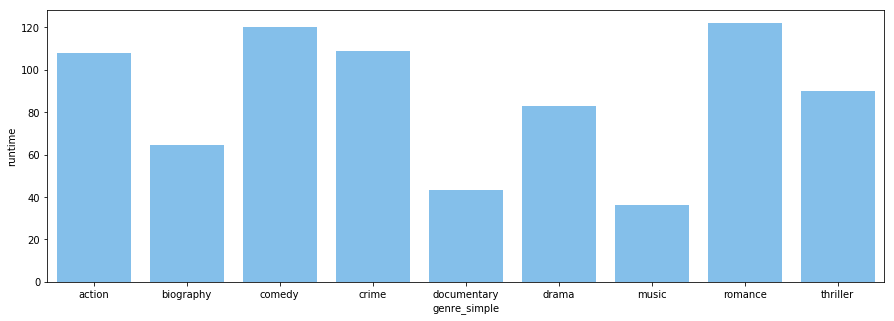

In [49]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 5]
sns.barplot(x='genre_simple', y='runtime', data=df_runtime_mean, color='#73C2FB')

#### thoughts
From this, we can see that **action**, **comedy**, **romance** movies have higher runtime.  
Whereas, **music** and **documentary** movies have lower runtime.